In [ ]:
########## ONLY in Colab ##########
!pip3 install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 53.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=5f4dff15e938d6dcde34a35ca6897d3e9f69e4ba49971030022a7b9c84021a05
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
#SparkSession has two attributes master(cluster manager) and appname
spark = SparkSession.builder.master("local[*]").appName('Music genre classification').getOrCreate()

In [ ]:
########## ONLY in Colab ##########
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')
########## ONLY in Colab ##########

Mounted at /content/drive


In [ ]:
# Load Data from Colab:

########## ONLY in Colab ##########
Music_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/Music_Data")
########## ONLY in Colab ##########

In [ ]:
# Print DF to make sure it is working
Music_df.show()

In [ ]:
# counting the total number of songs per label
df1=Music_df.select('label').groupBy('label').count().orderBy('count', ascending=False)
df1.show()

+---------+-----+
|    label|count|
+---------+-----+
|     jazz| 1100|
|      pop| 1100|
|    metal| 1100|
|    blues| 1100|
|   reggae| 1100|
|    disco| 1099|
|   hiphop| 1098|
|classical| 1098|
|     rock| 1098|
|  country| 1097|
+---------+-----+



In [ ]:
Music_df.na.drop().show()

In [ ]:
# Displaying all numeric columns
classification_df= Music_df.drop('filename','length')
classification_df.show()

In [ ]:
# checking the data types of dataframe
classification_df.printSchema()

root
 |-- chroma_stft_mean: string (nullable = true)
 |-- chroma_stft_var: string (nullable = true)
 |-- rms_mean: string (nullable = true)
 |-- rms_var: string (nullable = true)
 |-- spectral_centroid_mean: string (nullable = true)
 |-- spectral_centroid_var: string (nullable = true)
 |-- spectral_bandwidth_mean: string (nullable = true)
 |-- spectral_bandwidth_var: string (nullable = true)
 |-- rolloff_mean: string (nullable = true)
 |-- rolloff_var: string (nullable = true)
 |-- zero_crossing_rate_mean: string (nullable = true)
 |-- zero_crossing_rate_var: string (nullable = true)
 |-- harmony_mean: string (nullable = true)
 |-- harmony_var: string (nullable = true)
 |-- perceptr_mean: string (nullable = true)
 |-- perceptr_var: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- mfcc1_mean: string (nullable = true)
 |-- mfcc1_var: string (nullable = true)
 |-- mfcc2_mean: string (nullable = true)
 |-- mfcc2_var: string (nullable = true)
 |-- mfcc3_mean: string (nulla

**Feature transforming means scaling, converting, and modifying features so they can be used to train the machine learning model to make more accurate predictions**

In [ ]:
#converting the data types from string to float
from pyspark.sql.types import FloatType,IntegerType


changed_classificationdf = classification_df.withColumn("chroma_stft_mean", classification_df[("chroma_stft_mean")].cast(FloatType()))\
.withColumn("chroma_stft_var", classification_df["chroma_stft_var"].cast(FloatType()))\
.withColumn("rms_mean", classification_df["rms_mean"].cast(FloatType()))\
.withColumn("rms_var", classification_df["rms_var"].cast(FloatType()))\
.withColumn("spectral_centroid_mean", classification_df["spectral_centroid_mean"].cast(FloatType()))\
.withColumn("spectral_centroid_var", classification_df["spectral_centroid_var"].cast(FloatType()))\
.withColumn("spectral_bandwidth_mean", classification_df["spectral_bandwidth_mean"].cast(FloatType()))\
.withColumn("spectral_bandwidth_var", classification_df["spectral_bandwidth_var"].cast(FloatType()))\
.withColumn("rolloff_mean", classification_df["rolloff_mean"].cast(FloatType()))\
.withColumn("rolloff_var", classification_df["rolloff_var"].cast(FloatType()))\
.withColumn("zero_crossing_rate_mean", classification_df["zero_crossing_rate_mean"].cast(FloatType()))\
.withColumn("zero_crossing_rate_var", classification_df["zero_crossing_rate_var"].cast(FloatType()))\
.withColumn("harmony_mean", classification_df["harmony_mean"].cast(FloatType()))\
.withColumn("harmony_var", classification_df["harmony_var"].cast(FloatType()))\
.withColumn("perceptr_mean", classification_df["perceptr_mean"].cast(FloatType()))\
.withColumn("perceptr_var", classification_df["perceptr_var"].cast(FloatType()))\
.withColumn("tempo", classification_df["tempo"].cast(FloatType()))\
.withColumn("mfcc1_mean", classification_df["mfcc1_mean"].cast(FloatType()))\
.withColumn("mfcc1_var", classification_df["mfcc1_var"].cast(FloatType()))\
.withColumn("mfcc2_mean", classification_df["mfcc2_mean"].cast(FloatType()))\
.withColumn("mfcc2_var", classification_df["mfcc2_var"].cast(FloatType()))\
.withColumn("mfcc3_mean", classification_df["mfcc3_mean"].cast(FloatType()))\
.withColumn("mfcc3_var", classification_df["mfcc3_var"].cast(FloatType()))\
.withColumn("mfcc4_mean", classification_df["mfcc4_mean"].cast(FloatType()))\
.withColumn("mfcc4_var", classification_df["mfcc4_var"].cast(FloatType()))\
.withColumn("mfcc5_mean", classification_df["mfcc5_mean"].cast(FloatType()))\
.withColumn("mfcc5_var", classification_df["mfcc5_var"].cast(FloatType()))\
.withColumn("mfcc6_mean", classification_df["mfcc6_mean"].cast(FloatType()))\
.withColumn("mfcc6_var", classification_df["mfcc6_var"].cast(FloatType()))\
.withColumn("mfcc7_mean", classification_df["mfcc7_mean"].cast(FloatType()))\
.withColumn("mfcc7_var", classification_df["mfcc7_var"].cast(FloatType()))\
.withColumn("mfcc8_mean", classification_df["mfcc8_mean"].cast(FloatType()))\
.withColumn("mfcc8_var", classification_df["mfcc8_var"].cast(FloatType()))\
.withColumn("mfcc9_mean", classification_df["mfcc9_mean"].cast(FloatType()))\
.withColumn("mfcc9_var", classification_df["mfcc9_var"].cast(FloatType()))\
.withColumn("mfcc10_mean", classification_df["mfcc10_mean"].cast(FloatType()))\
.withColumn("mfcc10_var", classification_df["mfcc10_var"].cast(FloatType()))\
.withColumn("mfcc11_mean", classification_df["mfcc11_mean"].cast(FloatType()))\
.withColumn("mfcc11_var", classification_df["mfcc11_var"].cast(FloatType()))\
.withColumn("mfcc12_mean", classification_df["mfcc12_mean"].cast(FloatType()))\
.withColumn("mfcc12_var", classification_df["mfcc12_var"].cast(FloatType()))\
.withColumn("mfcc13_mean", classification_df["mfcc13_mean"].cast(FloatType()))\
.withColumn("mfcc13_var", classification_df["mfcc13_var"].cast(FloatType()))\
.withColumn("mfcc14_mean", classification_df["mfcc14_mean"].cast(FloatType()))\
.withColumn("mfcc14_var", classification_df["mfcc14_var"].cast(FloatType()))\
.withColumn("mfcc15_mean", classification_df["mfcc15_mean"].cast(FloatType()))\
.withColumn("mfcc15_var", classification_df["mfcc15_var"].cast(FloatType()))\
.withColumn("mfcc16_mean", classification_df["mfcc16_mean"].cast(FloatType()))\
.withColumn("mfcc16_var", classification_df["mfcc16_var"].cast(FloatType()))\
.withColumn("mfcc17_mean", classification_df["mfcc17_mean"].cast(FloatType()))\
.withColumn("mfcc17_var", classification_df["mfcc17_var"].cast(FloatType()))\
.withColumn("mfcc18_mean", classification_df["mfcc18_mean"].cast(FloatType()))\
.withColumn("mfcc18_var", classification_df["mfcc18_var"].cast(FloatType()))\
.withColumn("mfcc19_mean", classification_df["mfcc19_mean"].cast(FloatType()))\
.withColumn("mfcc19_var", classification_df["mfcc19_var"].cast(FloatType()))\
.withColumn("mfcc20_mean", classification_df["mfcc20_mean"].cast(FloatType()))\
.withColumn("mfcc20_var", classification_df["mfcc20_var"].cast(FloatType()))\
#.withColumn("length", classification_df["length"].cast(FloatType()))\
#.withColumn("label", classification_df["label"].cast(IntegerType()))\


In [ ]:
changed_classificationdf.show()

In [ ]:
import pandas as pd
df=changed_classificationdf.toPandas().transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,10980,10981,10982,10983,10984,10985,10986,10987,10988,10989
chroma_stft_mean,0.335406,0.343065,0.346815,0.363639,0.335579,0.37667,0.379909,0.33188,0.347877,0.358061,...,0.359345,0.354555,0.357302,0.363849,0.331063,0.349126,0.372564,0.347481,0.387527,0.369293
chroma_stft_var,0.091048,0.086147,0.092243,0.086856,0.088129,0.089702,0.088827,0.092119,0.094209,0.082957,...,0.087013,0.088747,0.087049,0.083415,0.086797,0.080515,0.082626,0.089019,0.084815,0.086759
rms_mean,0.130405,0.112699,0.132003,0.132565,0.143289,0.132618,0.130335,0.1406,0.13313,0.115312,...,0.042111,0.046246,0.068219,0.061953,0.049002,0.050019,0.057897,0.052403,0.06643,0.050524
rms_var,0.003521,0.00145,0.00462,0.002448,0.001701,0.003583,0.003166,0.002546,0.002538,0.001846,...,0.000099,0.000024,0.001088,0.000108,0.000085,0.000097,0.000088,0.000701,0.00032,0.000067
spectral_centroid_mean,1773.065063,1816.693726,1788.539673,1655.289062,1630.65625,1994.915161,1962.150146,1701.890869,1746.473511,1763.948975,...,1273.740112,1285.381226,1767.109741,1883.556519,1453.105225,1499.083008,1847.965088,1346.157715,2084.515381,1634.330078
spectral_centroid_var,167541.625,90525.6875,111407.4375,111952.28125,79667.265625,211700.625,177443.0625,35678.128906,138073.9375,61493.421875,...,83779.671875,140474.609375,1039181.6875,445893.28125,90925.992188,164266.890625,281054.9375,662956.25,203891.046875,411429.15625
spectral_bandwidth_mean,1972.744385,2010.051514,2084.565186,1960.040039,1948.503906,2152.767822,2146.503418,1979.387573,1887.619751,1874.195679,...,1572.311279,1610.539673,1781.612549,2067.611084,1853.225342,1718.707275,1906.468506,1561.859131,2018.366211,1867.422363
spectral_bandwidth_var,117335.773438,65671.875,75124.921875,82913.640625,60204.019531,74263.875,98020.539062,36670.726562,117069.921875,51944.921875,...,56483.195312,84477.351562,218272.921875,59661.3125,34680.734375,85931.578125,99727.039062,138762.84375,22860.992188,119722.210938
rolloff_mean,3714.560303,3869.682129,3997.63916,3568.300293,3469.99292,4371.98584,4325.026855,3625.280273,3586.934814,3505.522705,...,2548.620117,2558.310059,3225.425293,4014.534424,3099.70459,3015.55957,3746.69458,2442.362061,4313.266113,3462.042236
rolloff_var,1080789.875,672244.75,790712.6875,921652.375,610211.0625,1067105.5,1172362.75,317461.6875,1057632.625,445157.90625,...,340511.875,651692.375,4377283.0,1372705.875,472978.90625,847952.75,1170889.875,2602871.0,496887.84375,1517016.375


In [ ]:
# Transforming categorical values from String to numeric
from pyspark.ml.feature import StringIndexer


labelIndexer = StringIndexer(inputCol='label',outputCol='MusicGenre')
changed_classificationdf=labelIndexer.fit(changed_classificationdf).transform(changed_classificationdf)

changed_classificationdf.show()


In [ ]:
changed_classificationdf.printSchema()

root
 |-- chroma_stft_mean: float (nullable = true)
 |-- chroma_stft_var: float (nullable = true)
 |-- rms_mean: float (nullable = true)
 |-- rms_var: float (nullable = true)
 |-- spectral_centroid_mean: float (nullable = true)
 |-- spectral_centroid_var: float (nullable = true)
 |-- spectral_bandwidth_mean: float (nullable = true)
 |-- spectral_bandwidth_var: float (nullable = true)
 |-- rolloff_mean: float (nullable = true)
 |-- rolloff_var: float (nullable = true)
 |-- zero_crossing_rate_mean: float (nullable = true)
 |-- zero_crossing_rate_var: float (nullable = true)
 |-- harmony_mean: float (nullable = true)
 |-- harmony_var: float (nullable = true)
 |-- perceptr_mean: float (nullable = true)
 |-- perceptr_var: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- mfcc1_mean: float (nullable = true)
 |-- mfcc1_var: float (nullable = true)
 |-- mfcc2_mean: float (nullable = true)
 |-- mfcc2_var: float (nullable = true)
 |-- mfcc3_mean: float (nullable = true)
 |-- mfcc3

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
#from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer

In [ ]:
#assembling features
feature_col=['chroma_stft_mean','chroma_stft_var','rms_mean','rms_var',
             'spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean',
             'spectral_bandwidth_var','spectral_bandwidth_mean','rolloff_mean','rolloff_var',
             'zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var',
             'perceptr_mean','perceptr_var','tempo','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var',
             'mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean',
             'mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var',
             'mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var',
             'mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var',
             'mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var',
             'mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var']

In [ ]:
assembler=VectorAssembler(inputCols=feature_col,outputCol='Selected_features')

In [ ]:
final_data=assembler.transform(changed_classificationdf)

In [ ]:
final_data.show(5)

+----------------+---------------+----------+------------+----------------------+---------------------+-----------------------+----------------------+------------+-----------+-----------------------+----------------------+-------------+-----------+--------------+------------+----------+-----------+---------+----------+---------+-----------+---------+----------+---------+-----------+---------+----------+----------+----------+---------+----------+---------+----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----+----------+--------------------+
|chroma_stft_mean|chroma_stft_var|  rms_mean|     rms_var|spectral_centroid_mean|spectral_centroid_var|spectral_bandwidth_mean|spectral_bandwidth_var|rolloff_mean|rolloff_var|zero_crossing_rate_mean|zero_crossing_rate_var| harm

Performing Normalization

In [ ]:
from pyspark.ml.feature import StandardScaler


In [ ]:
scaler=StandardScaler(inputCol='Selected_features',outputCol='scaled_features',withStd=True, withMean=False)


In [ ]:
scalerModel=scaler.fit(final_data)

In [ ]:
classification_final_data=scalerModel.transform(final_data)

In [ ]:
classification_final_data.printSchema()

root
 |-- chroma_stft_mean: float (nullable = true)
 |-- chroma_stft_var: float (nullable = true)
 |-- rms_mean: float (nullable = true)
 |-- rms_var: float (nullable = true)
 |-- spectral_centroid_mean: float (nullable = true)
 |-- spectral_centroid_var: float (nullable = true)
 |-- spectral_bandwidth_mean: float (nullable = true)
 |-- spectral_bandwidth_var: float (nullable = true)
 |-- rolloff_mean: float (nullable = true)
 |-- rolloff_var: float (nullable = true)
 |-- zero_crossing_rate_mean: float (nullable = true)
 |-- zero_crossing_rate_var: float (nullable = true)
 |-- harmony_mean: float (nullable = true)
 |-- harmony_var: float (nullable = true)
 |-- perceptr_mean: float (nullable = true)
 |-- perceptr_var: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- mfcc1_mean: float (nullable = true)
 |-- mfcc1_var: float (nullable = true)
 |-- mfcc2_mean: float (nullable = true)
 |-- mfcc2_var: float (nullable = true)
 |-- mfcc3_mean: float (nullable = true)
 |-- mfcc3

In [ ]:
classification_final_data.select('Selected_features','scaled_features').show()

+--------------------+--------------------+
|   Selected_features|     scaled_features|
+--------------------+--------------------+
|[0.33540636301040...|[3.73916526813369...|
|[0.34306535124778...|[3.82454892797013...|
|[0.34681475162506...|[3.86634785969342...|
|[0.36363878846168...|[4.05390498784294...|
|[0.33557942509651...|[3.74109459271712...|
|[0.37666973471641...|[4.19917611868637...|
|[0.37990874052047...|[4.23528508781006...|
|[0.33187994360923...|[3.69985216498509...|
|[0.34787738323211...|[3.87819425152171...|
|[0.35806125402450...|[3.99172571711552...|
|[0.40240088105201...|[4.48603116765979...|
|[0.34550726413726...|[3.85177177425785...|
|[0.33811864256858...|[3.76940220648631...|
|[0.33075052499771...|[3.68726122065267...|
|[0.34802699089050...|[3.87986210228955...|
|[0.32943502068519...|[3.67259576233731...|
|[0.34366619586944...|[3.83124724257778...|
|[0.32773175835609...|[3.65360751391430...|
|[0.32942804694175...|[3.67251801789912...|
|[0.29298686981201...|[3.2662657

In [ ]:
investigated_data=classification_final_data.select('MusicGenre','scaled_features')
investigated_data.show(5)

+----------+--------------------+
|MusicGenre|     scaled_features|
+----------+--------------------+
|       0.0|[3.73916526813369...|
|       0.0|[3.82454892797013...|
|       0.0|[3.86634785969342...|
|       0.0|[4.05390498784294...|
|       0.0|[3.74109459271712...|
+----------+--------------------+
only showing top 5 rows



In [ ]:
investigated_data.printSchema()

root
 |-- MusicGenre: double (nullable = false)
 |-- scaled_features: vector (nullable = true)



In [ ]:
# Split the data into training and test sets 
(trainingData, testData) = investigated_data.randomSplit([0.8, 0.2],seed=2018)
print("Training Dataset Count:" + str(trainingData.count()))
print("Test Dataset Count:" + str(testData.count()))

Training Dataset Count:8800
Test Dataset Count:2190


In [ ]:
from pyspark.ml.classification import RandomForestClassifier
# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="MusicGenre", featuresCol="scaled_features",numTrees=200,featureSubsetStrategy="auto", impurity='gini', maxDepth=23,maxBins=132,subsamplingRate=1.0,seed=2018)


In [ ]:
rfModel = rf.fit(trainingData)
rfpredictions = rfModel.transform(testData)
rfpredictions.show(5)

+----------+--------------------+--------------------+--------------------+----------+
|MusicGenre|     scaled_features|       rawPrediction|         probability|prediction|
+----------+--------------------+--------------------+--------------------+----------+
|       0.0|[2.22840345022533...|[39.0,52.0,0.0,0....|[0.195,0.26,0.0,0...|       6.0|
|       0.0|[2.37979629109323...|[100.0,37.0,0.0,2...|[0.5,0.185,0.0,0....|       0.0|
|       0.0|[2.40270880631788...|[138.0,20.0,2.0,3...|[0.69,0.1,0.01,0....|       0.0|
|       0.0|[2.40339106359911...|[126.0,24.0,0.0,1...|[0.63,0.12,0.0,0....|       0.0|
|       0.0|[2.45101949922130...|[181.0,1.0,2.0,1....|[0.905,0.005,0.01...|       0.0|
+----------+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
# Select example rows to display.
rfpredictions.select("prediction", "MusicGenre","scaled_features").show(5)

+----------+----------+--------------------+
|prediction|MusicGenre|     scaled_features|
+----------+----------+--------------------+
|       6.0|       0.0|[2.22840345022533...|
|       0.0|       0.0|[2.37979629109323...|
|       0.0|       0.0|[2.40270880631788...|
|       0.0|       0.0|[2.40339106359911...|
|       0.0|       0.0|[2.45101949922130...|
+----------+----------+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
rfevaluator = MulticlassClassificationEvaluator(labelCol='MusicGenre',predictionCol="prediction", metricName='accuracy')
accuracy = rfevaluator.evaluate(rfpredictions)
print("Test accuracy of Random Forest classifier is  = " , accuracy)
print("Test Error of Random Forest classifier is  = %g" % (1.0 - accuracy))
#print(rfModel.toDebugString)

Test accuracy of Random Forest classifier is  =  0.9
Test Error of Random Forest classifier is  = 0.1


In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = rfpredictions.select(['prediction','MusicGenre']).withColumn('MusicGenre', F.col('MusicGenre').cast(FloatType())).orderBy('prediction')
preds_and_labels1 = preds_and_labels.select(['prediction','MusicGenre'])
metrics = MulticlassMetrics(preds_and_labels1.rdd.map(tuple))
confusion=metrics.confusionMatrix().toArray()
print("Confusion Matrix of Music genre classification \n")
print(confusion)


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


Confusion Matrix of Music genre classification 

[[195.   0.   5.   0.   8.   1.   1.   1.   0.   3.]
 [ 10. 197.   0.   0.   0.   0.   5.   0.   2.   1.]
 [  1.   0. 220.   0.   2.   1.   0.   3.   4.   0.]
 [  0.   1.   0. 183.   0.   3.   1.   4.   2.   2.]
 [  1.   2.   1.   4. 195.   2.   0.   2.   0.  12.]
 [  1.   0.   2.   3.   4. 183.   2.   1.   1.   4.]
 [  0.   6.   0.   0.   1.   0. 216.   0.   0.   1.]
 [  0.   0.   1.   4.   5.   2.   0. 198.   0.   1.]
 [  7.   4.  12.   4.   7.  10.   0.   1. 186.  13.]
 [ 10.   7.   0.   3.   7.   2.   3.   0.   5. 198.]]


In [ ]:
acc = metrics.accuracy
f1 = metrics.fMeasure(1.0)
precision = metrics.precision(1.0)
recall = metrics.recall(1.0)
print("                         The Music genre classification result\n")
print("Accuracy         F1-Score                     Precision                      Recall")
print(acc,"          ",f1,"        ",precision,"         ",recall)

#auc = metrics.areaUnderROC

                         The Music genre classification result

Accuracy         F1-Score                     Precision                      Recall
0.9            0.912037037037037          0.9078341013824884           0.9162790697674419


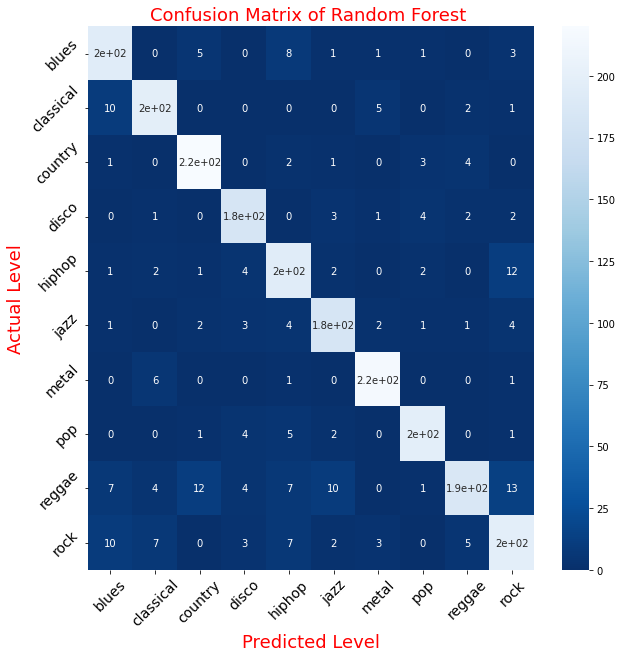

In [ ]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
x_axis_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # labels for x-axis
y_axis_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # labels for y-axis
plot=sns.heatmap(confusion,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,cmap=plt.cm.Blues_r)
plot.set_title('Confusion Matrix of Random Forest ',fontsize=18,color='red')
plot.set_xlabel('Predicted Level', fontsize=18,color='red')
plot.set_ylabel('Actual Level', fontsize=18,color='red')
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14,rotation=45)
plt.savefig("confusion.png")
plt.show()

**Decision Tree**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
dt = DecisionTreeClassifier(labelCol="MusicGenre", featuresCol="scaled_features",impurity='gini', maxDepth=10, maxBins=32)

In [ ]:
dtModel = dt.fit(trainingData)
dtpredictions = dtModel.transform(testData)
dtpredictions.show(5)

+----------+--------------------+--------------------+--------------------+----------+
|MusicGenre|     scaled_features|       rawPrediction|         probability|prediction|
+----------+--------------------+--------------------+--------------------+----------+
|       0.0|[2.22840345022533...|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       6.0|
|       0.0|[2.37979629109323...|[45.0,40.0,0.0,4....|[0.17241379310344...|       9.0|
|       0.0|[2.40270880631788...|[45.0,40.0,0.0,4....|[0.17241379310344...|       9.0|
|       0.0|[2.40339106359911...|[19.0,3.0,0.0,0.0...|[0.86363636363636...|       0.0|
|       0.0|[2.45101949922130...|[136.0,4.0,0.0,0....|[0.78612716763005...|       0.0|
+----------+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
dtevaluator = MulticlassClassificationEvaluator(labelCol='MusicGenre',predictionCol="prediction", metricName='accuracy')
accuracy = dtevaluator.evaluate(dtpredictions)
print("Test accuracy = " , accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Test accuracy =  0.6191780821917808
Test Error = 0.380822


In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = dtpredictions.select(['prediction','MusicGenre']).withColumn('MusicGenre', F.col('MusicGenre').cast(FloatType())).orderBy('prediction')
preds_and_labels1 = preds_and_labels.select(['prediction','MusicGenre'])
metrics = MulticlassMetrics(preds_and_labels1.rdd.map(tuple))
confusion=metrics.confusionMatrix().toArray()
print("Confusion Matrix of Music genre classification \n")
print(confusion)


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


Confusion Matrix of Music genre classification 

[[113.   8.  11.   2.   8.   4.   1.  14.  12.  41.]
 [  8. 145.   2.   6.   1.   4.   9.   1.  13.  26.]
 [  7.   6. 164.   1.   3.  10.   0.  16.  24.   0.]
 [  1.   2.   1. 149.   7.  11.   0.  11.   6.   8.]
 [  9.   0.   1.   8. 121.   8.   0.  17.  14.  41.]
 [ 11.   4.   4.  13.  12. 102.   1.  22.  16.  16.]
 [  0.  13.   0.   0.   4.   0. 192.   0.   5.  10.]
 [  4.   1.  10.  12.  21.  17.   0. 138.   4.   4.]
 [ 12.  20.  18.  10.  11.  23.   0.  10.  95.  45.]
 [ 23.  16.   1.  19.  16.   6.   2.   6.   9. 137.]]


In [ ]:
acc = metrics.accuracy
f1 = metrics.fMeasure(1.0)
precision = metrics.precision(1.0)
recall = metrics.recall(1.0)
print("                         The Music genre classification result DT\n")
print("Accuracy                         F1-Score                     Precision                      Recall")
print(acc,"          ",f1,"        ",precision,"         ",recall)

                         The Music genre classification result DT

Accuracy                         F1-Score                     Precision                      Recall
0.6191780821917808            0.6744186046511628          0.6744186046511628           0.6744186046511628


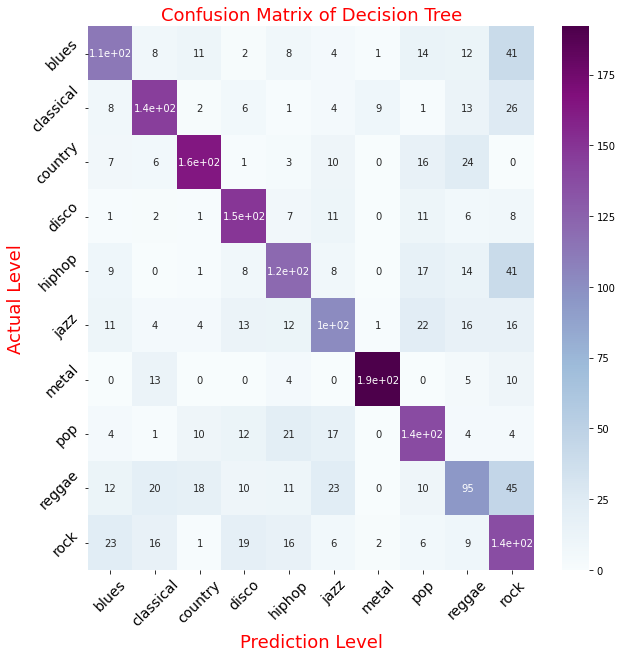

In [ ]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
x_axis_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # labels for x-axis
y_axis_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # labels for y-axis
plot=sns.heatmap(confusion,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,cmap="BuPu")
plot.set_title('Confusion Matrix of Decision Tree',fontsize=18,color='red')
plot.set_xlabel('Prediction Level', fontsize=18,color='red')
plot.set_ylabel('Actual Level', fontsize=18,color='red')
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14,rotation=45)
plt.show()

In [ ]:
# install nbconvert
!pip3 install nbconvert

# convert ipynb to html
# file name: "Music_classification.ipynb
!jupyter nbconvert --to html Music_classification.ipynb


[NbConvertApp] Converting notebook Music_classification.ipynb to html
[NbConvertApp] Writing 555960 bytes to Music_classification.html
